# Digital Signal Processing (DSP) Lab Problems
Md. Farukuzzaman Faruk
March 18, 2025

## 1 Introduction
This document contains lab problems on Digital Signal Processing (DSP), including Discrete Fourier Transform (DFT), Discrete-Time Fourier Transform (DTFT), and Filtering. Python implementations are provided for each problem.

## 2 Basic Signal Operations
### 2.1 Signal Generation and Transformations
Generate a discrete-time sine wave and perform the following operations:
- Time Shifting: $x[n - k]$
- Time Reversal: $x[-n]$
- Time Scaling: $x[a dot n]$

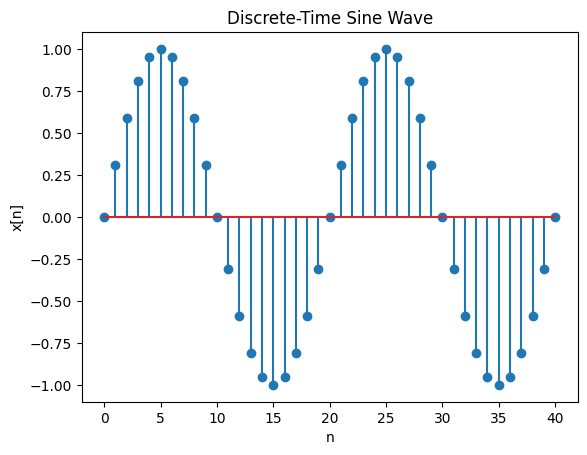

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a discrete-time sine wave
n = np.arange(0, 41)
frequency = 0.05
sine_wave = np.sin(2 * np.pi * frequency * n )

# Plot the sine wave
plt.stem(n, sine_wave)
plt.title('Discrete-Time Sine Wave')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

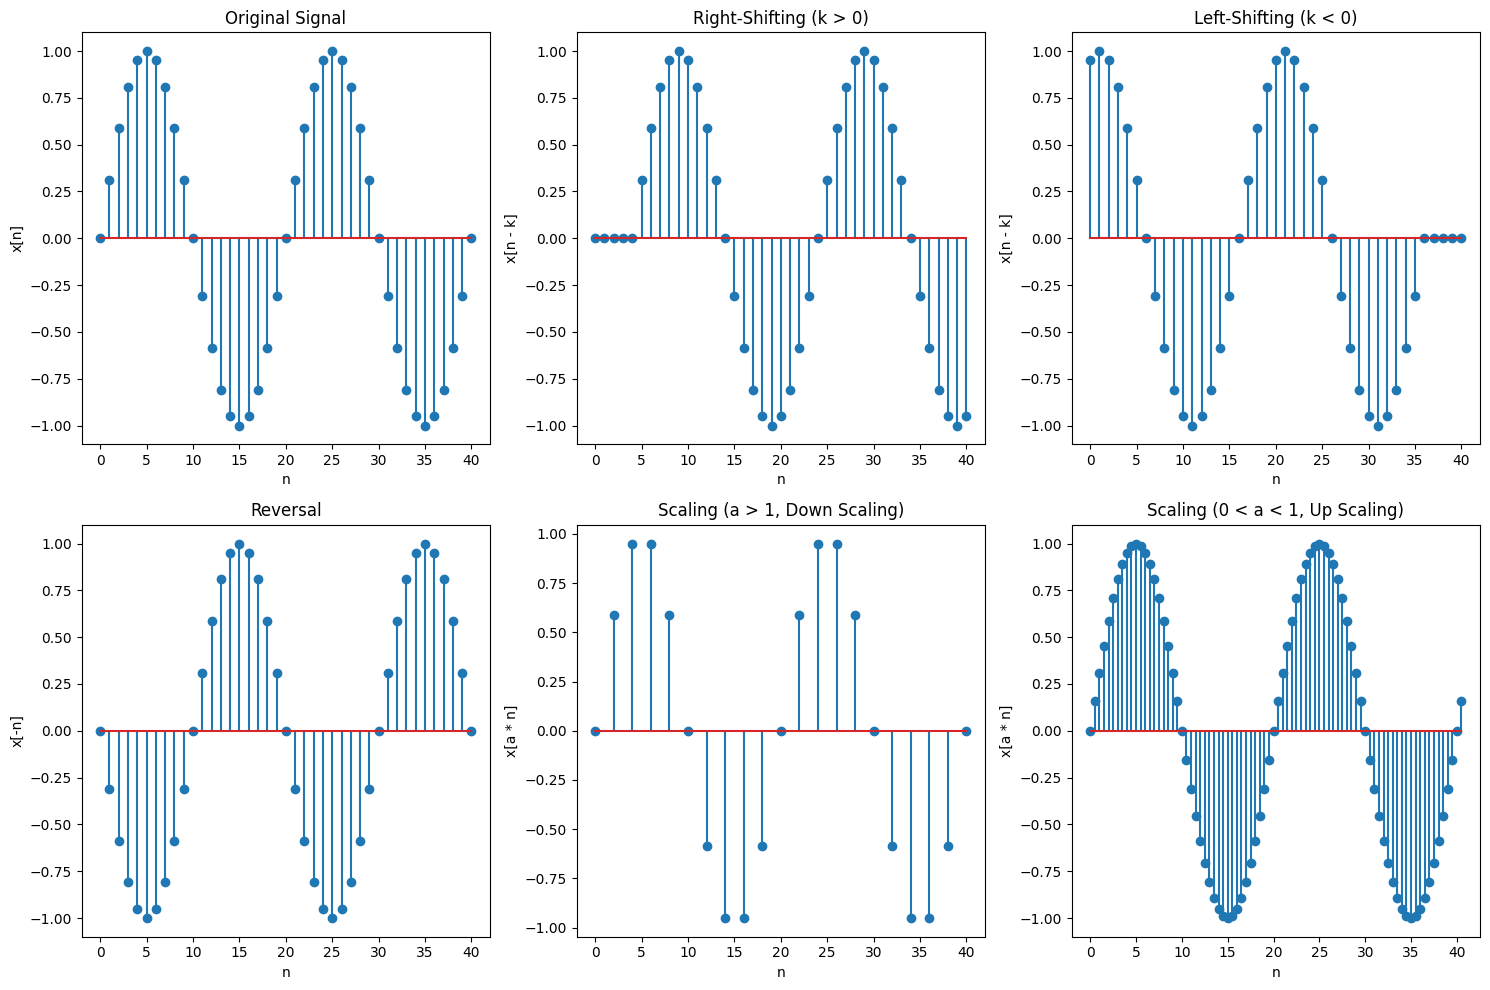

In [5]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.stem(n, sine_wave)
plt.title('Original Signal')
plt.xlabel('n')
plt.ylabel('x[n]')

# Shifting: x[n-k] when k is positive (Right Shift)
plt.subplot(2, 3, 2)
k = 4  # Positive shift
right_shift = np.zeros(len(sine_wave))
if k < len(sine_wave):
    right_shift[k:] = sine_wave[:-k]
plt.stem(n, right_shift)
plt.title('Right-Shifting (k > 0)')
plt.xlabel('n')
plt.ylabel('x[n - k]')

# Shifting: x[n-k] when k is negative (Left Shift)
plt.subplot(2, 3, 3)
k = -4
left_shift = np.zeros(len(sine_wave))
if abs(k) < len(sine_wave):
    left_shift[:k] = sine_wave[abs(k):]
plt.stem(n, left_shift)
plt.title('Left-Shifting (k < 0)')
plt.xlabel('n')
plt.ylabel('x[n - k]')

# Reversal: x[-n]
plt.subplot(2, 3, 4)
reversed_wave = sine_wave[::-1]
plt.stem(n, reversed_wave)
plt.title('Reversal')
plt.xlabel('n')
plt.ylabel('x[-n]')

# Scaling: x[a * n] for a > 1
plt.subplot(2, 3, 5)
a = 2
N = np.arange(0, len(n), a)
down_scaled_wave = np.sin(2 * np.pi * frequency * N)
plt.stem(N, down_scaled_wave)
plt.title('Scaling (a > 1, Down Scaling)')
plt.xlabel('n')
plt.ylabel('x[a * n]')

# Scaling: x[a * n] for 0 < a < 1
plt.subplot(2, 3, 6)
a = 0.5
N = np.arange(0, len(n) / a) * a
up_scaled_wave = np.sin(2 * np.pi * frequency * N)
plt.stem(N, up_scaled_wave)
plt.title('Scaling (0 < a < 1, Up Scaling)')
plt.xlabel('n')
plt.ylabel('x[a * n]')

plt.tight_layout()
plt.show()

Manual DFT: [-2.15519326e-15+0.00000000e+00j  4.86454602e-02-6.33614607e-01j
  3.07736571e+00-1.99234494e+01j -2.92275886e-01+1.24899412e+00j
 -2.11312716e-01+6.67719679e-01j -1.87311267e-01+4.64750470e-01j
 -1.76438607e-01+3.56346932e-01j -1.70484829e-01+2.86767555e-01j
 -1.66844052e-01+2.37201847e-01j -1.64450035e-01+1.99407355e-01j
 -1.62793518e-01+1.69153083e-01j -1.61604210e-01+1.44021124e-01j
 -1.60727204e-01+1.22517024e-01j -1.60068415e-01+1.03659257e-01j
 -1.59568087e-01+8.67703749e-02j -1.59186960e-01+7.13623394e-02j
 -1.58898618e-01+5.70695244e-02j -1.58685055e-01+4.36074169e-02j
 -1.58534021e-01+3.07458616e-02j -1.58437411e-01+1.82908262e-02j
 -1.58390278e-01+6.07123583e-03j -1.58390278e-01-6.07123583e-03j
 -1.58437411e-01-1.82908262e-02j -1.58534021e-01-3.07458616e-02j
 -1.58685055e-01-4.36074169e-02j -1.58898618e-01-5.70695244e-02j
 -1.59186960e-01-7.13623394e-02j -1.59568087e-01-8.67703749e-02j
 -1.60068415e-01-1.03659257e-01j -1.60727204e-01-1.22517024e-01j
 -1.61604210e

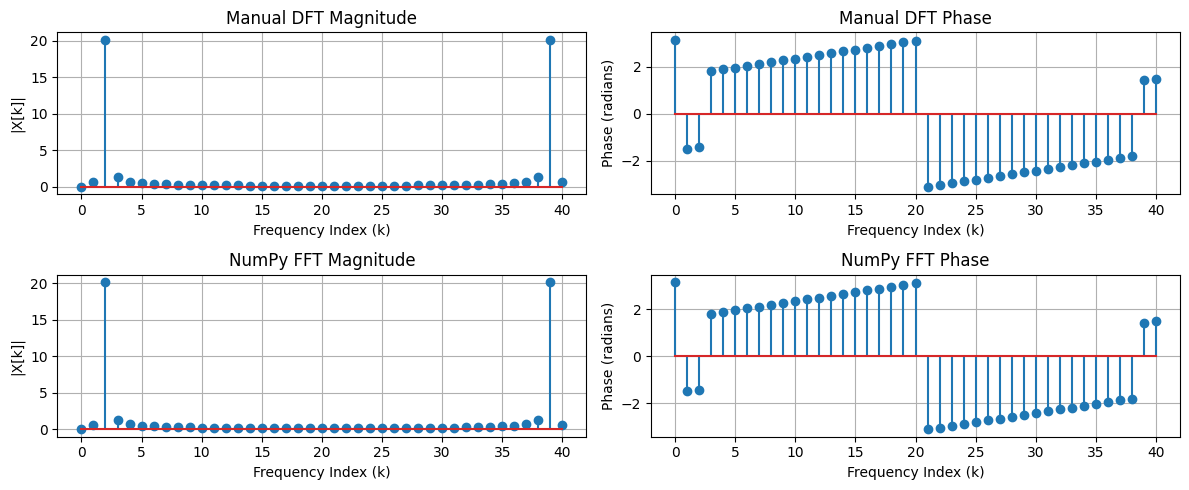

In [6]:
N = len(sine_wave)
dft_manual = np.zeros(N, dtype=complex)

for k in range(N):
    for i in range(N):
        dft_manual[k] += sine_wave[i] * np.exp(-2j * np.pi * k * i / N)

dft_numpy = np.fft.fft(sine_wave)

print('Manual DFT:', dft_manual)
print('NumPy FFT:', dft_numpy,'\n')

plt.figure(figsize=(12, 5))

plt.subplot(2, 2, 1)
plt.stem(np.arange(N), np.abs(dft_manual))
plt.title('Manual DFT Magnitude')
plt.xlabel('Frequency Index (k)')
plt.ylabel('|X[k]|')
plt.grid()

plt.subplot(2, 2, 2)
plt.stem(np.arange(N), np.angle(dft_manual))
plt.title('Manual DFT Phase')
plt.xlabel('Frequency Index (k)')
plt.ylabel('Phase (radians)')
plt.grid()

plt.subplot(2, 2, 3)
plt.stem(np.arange(N), np.abs(dft_numpy))
plt.title('NumPy FFT Magnitude')
plt.xlabel('Frequency Index (k)')
plt.ylabel('|X[k]|')
plt.grid()

plt.subplot(2, 2, 4)
plt.stem(np.arange(N), np.angle(dft_numpy))
plt.title('NumPy FFT Phase')
plt.xlabel('Frequency Index (k)')
plt.ylabel('Phase (radians)')
plt.grid()

plt.tight_layout()
plt.show()

## 4 Discrete-Time Fourier Transform (DTFT)
The DTFT is computed as:
$$X(e^{j\omega}) = \sum_{n=-\infty}^{\infty} x[n] e^{-j\omega n}$$

<>:12: SyntaxWarning: invalid escape sequence '\o'
<>:12: SyntaxWarning: invalid escape sequence '\o'
/var/folders/lb/dlxc524x1593j9m77hphrttr0000gn/T/ipykernel_68510/1308972475.py:12: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel('|X(e^{j\omega})|')


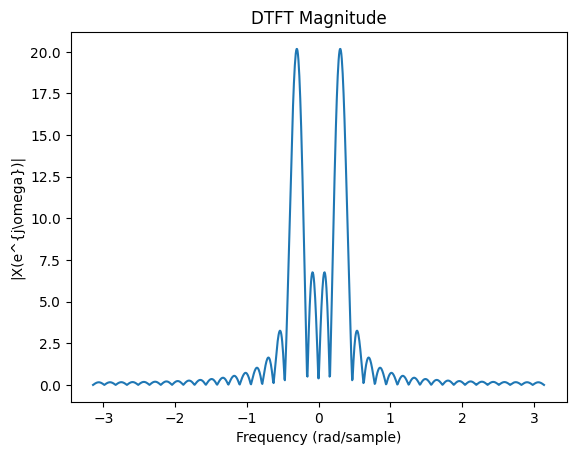

In [7]:
# Compute DTFT
omega = np.linspace(-np.pi, np.pi, 1000)
X_dtft = np.zeros_like(omega, dtype=complex)
for i, w in enumerate(omega):
    for n_val, x_val in zip(n, sine_wave):
        X_dtft[i] += x_val * np.exp(-1j * w * n_val)

# Plot the magnitude of the DTFT
plt.plot(omega, np.abs(X_dtft))
plt.title('DTFT Magnitude')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('|X(e^{j\omega})|')
plt.show()

## 5 Fast Fourier Transform (FFT) Efficiency
Compare execution times for manual DFT vs. FFT.

In [8]:
import time

# Execution time for manual DFT
start_time = time.time()
N = len(sine_wave)
dft_manual = np.zeros(N, dtype=complex)

for k in range(N):
    for i in range(N):
        dft_manual[k] += sine_wave[i] * np.exp(-2j * np.pi * k * i / N)
manual_dft_time = time.time() - start_time

# Execution time for numpy.fft.fft()
start_time = time.time()
np.fft.fft(sine_wave)
numpy_fft_time = time.time() - start_time

print('Manual DFT time:', manual_dft_time)
print('NumPy FFT time:', numpy_fft_time)

Manual DFT time: 0.0040667057037353516
NumPy FFT time: 0.00014400482177734375


## 6 Filtering in the Frequency Domain
Apply a low-pass filter in the frequency domain to remove high-frequency components.

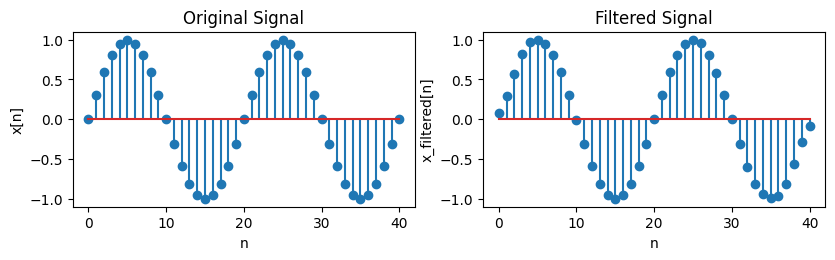

In [9]:
def low_pass_filter(X, cutoff):
    N = len(X)
    H = np.zeros(N)
    H[:cutoff] = 1
    H[-cutoff:] = 1
    return X * H

cutoff = 10

X_filtered = low_pass_filter(np.fft.fft(sine_wave), cutoff)
x_filtered = np.fft.ifft(X_filtered)

plt.figure(figsize=(15, 5))

plt.subplot(2, 3, 1)
plt.stem(n, sine_wave)
plt.title('Original Signal')
plt.xlabel('n')
plt.ylabel('x[n]')

plt.subplot(2, 3, 2)
plt.stem(n, np.real(x_filtered))
plt.title('Filtered Signal')
plt.xlabel('n')
plt.ylabel('x_filtered[n]')
plt.show()